# 1. Initalization

In [121]:
import pandas as pd
import numpy as np
from pathlib import Path

project_root = Path.cwd().resolve().parent
data_dir = project_root / "data"

# Import MSTR
mstr = pd.read_csv(
    "../data/MSTR.csv",
    header=2,
    parse_dates=["Date"],
    date_format="%Y-%m-%d",
    index_col="Date"
)

mstr.columns = ["Close", "High", "Low", "Open", "Volume"]
mstr.sort_index(inplace=True)
mstr.index = pd.to_datetime(mstr.index)


# Import BTC-USD
btc = pd.read_csv(
    "../data/BTC-USD.csv",
    header=2,
    parse_dates=["Date"],
    date_format="%Y-%m-%d",
    index_col="Date"
)

btc.columns = ["Close", "High", "Low", "Open", "Volume"]
btc.sort_index(inplace=True)
btc.index = pd.to_datetime(btc.index)
btc = btc.reindex(mstr.index)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1826 entries, 2018-08-13 to 2025-11-14
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1826 non-null   float64
 1   High    1826 non-null   float64
 2   Low     1826 non-null   float64
 3   Open    1826 non-null   float64
 4   Volume  1826 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 85.6 KB


<Axes: xlabel='Date'>

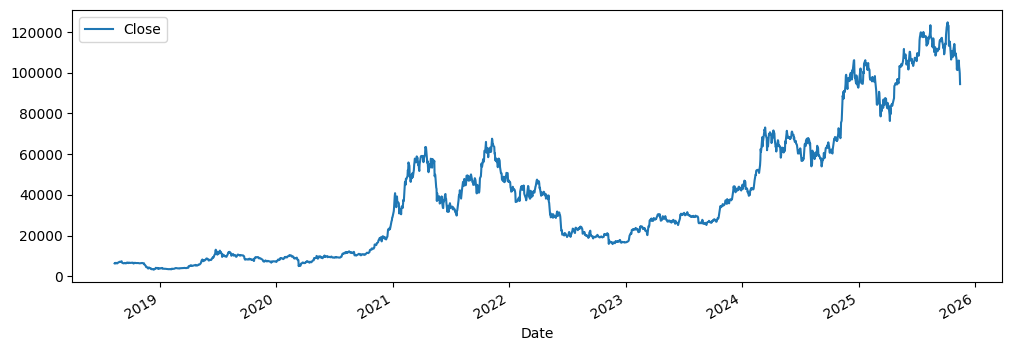

In [122]:
btc.info()
btc.describe()
btc.isna().sum()
btc.plot(y="Close", figsize=(12,4))

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1826 entries, 2018-08-13 to 2025-11-14
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1826 non-null   float64
 1   High    1826 non-null   float64
 2   Low     1826 non-null   float64
 3   Open    1826 non-null   float64
 4   Volume  1826 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 85.6 KB


<Axes: xlabel='Date'>

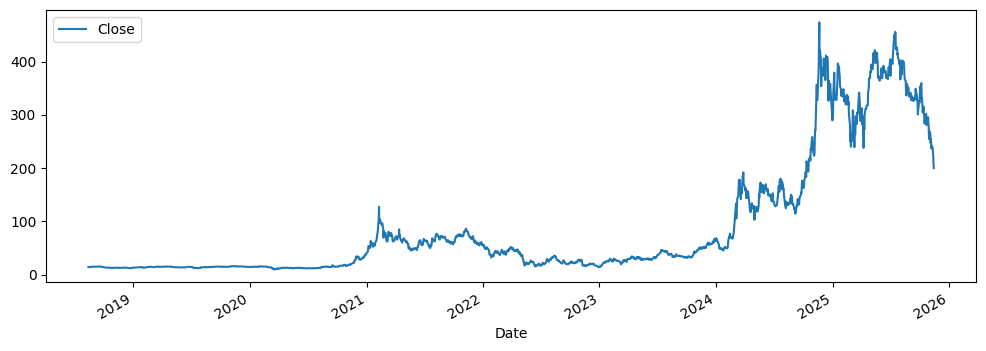

In [123]:
mstr.info()
mstr.describe()
mstr.isna().sum()
mstr.plot(y="Close", figsize=(12,4))

<Axes: title={'center': 'BTC Close vs EMA21 vs Quarterly VWAP'}, xlabel='Date'>

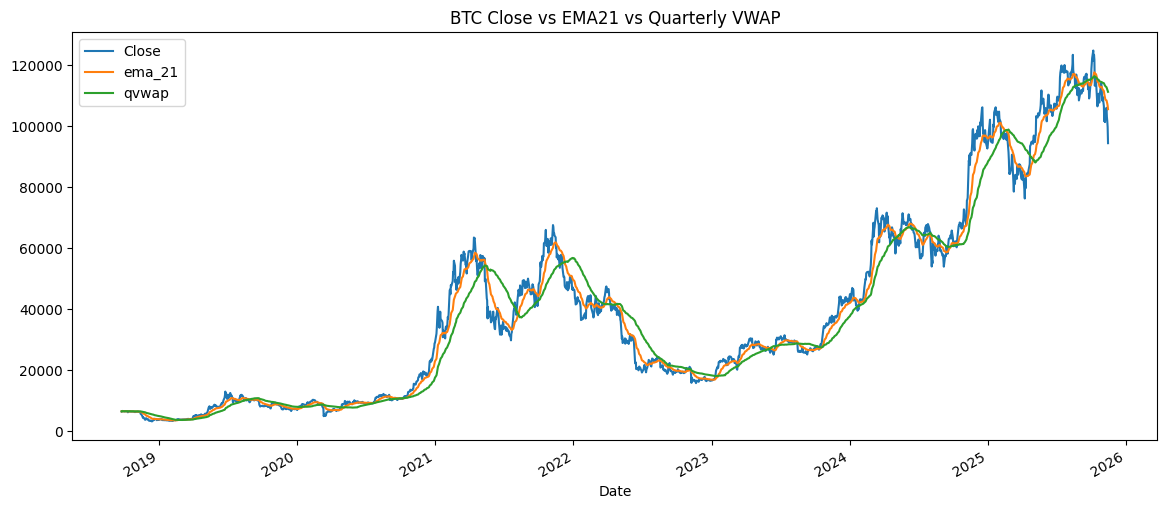

In [124]:
# Bitcoin
btc["log_ret"] = np.log(btc["Close"]).diff()

# EMA 21
btc["ema_21"] = btc["Close"].ewm(span=21).mean()

# Quarterly VWAP
btc["qvwap"] = (
    (btc["Close"] * btc["Volume"]).rolling("90D").sum()
    / btc["Volume"].rolling("90D").sum()
)

# Standarized log return
window=30
rolling_mean = btc["log_ret"].rolling(window).mean()
rolling_std = btc["log_ret"].rolling(window).std()
btc["z_log_ret"] = (btc["log_ret"]-rolling_mean)/rolling_std
btc.dropna(inplace=True)

btc[["Close", "ema_21", "qvwap"]].plot(
    figsize=(14,6),
    title="BTC Close vs EMA21 vs Quarterly VWAP"
)

<Axes: title={'center': 'BTC Standardized Log-Returns (30-Day Window)'}, xlabel='Date'>

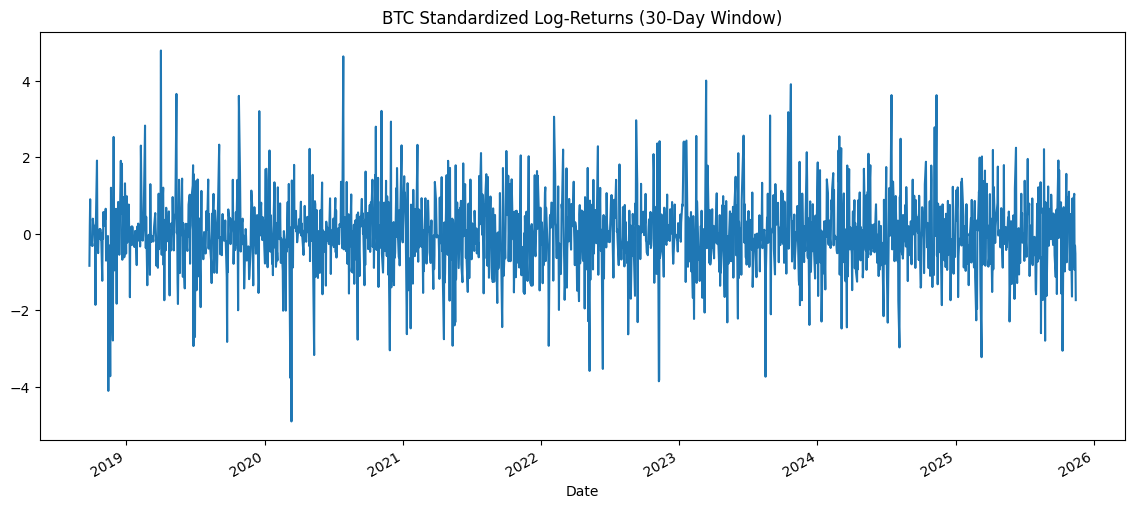

In [125]:
btc["z_log_ret"].plot(
    figsize=(14,6),
    title="BTC Standardized Log-Returns (30-Day Window)"
)

<Axes: >

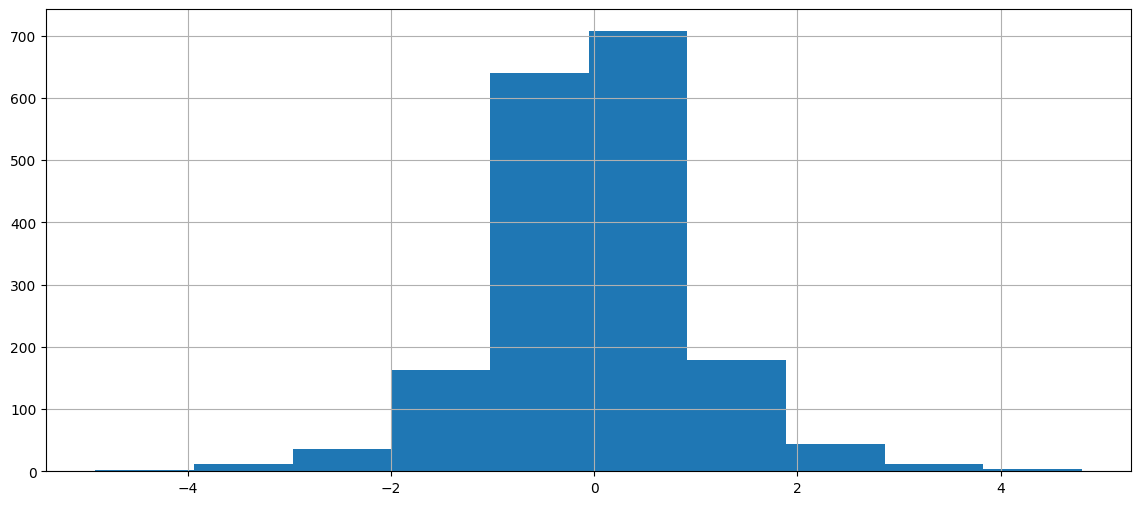

In [126]:
btc["z_log_ret"].hist(figsize=(14, 6))

<Axes: title={'center': 'MSTR Close vs EMA21 vs Quarterly VWAP'}, xlabel='Date'>

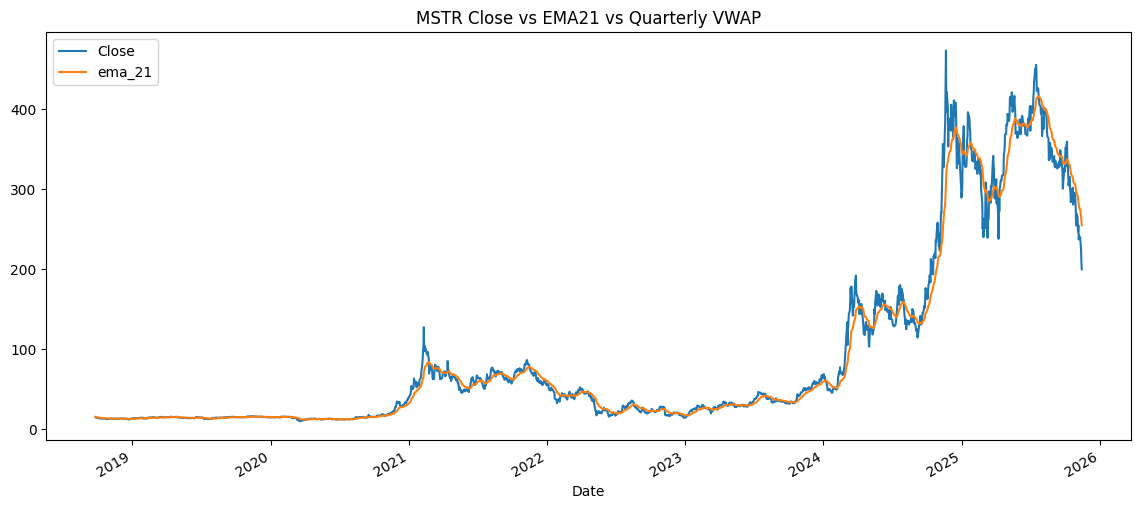

In [127]:
# MSTR
mstr["log_ret"] = np.log(mstr["Close"]).diff()

# EMA 21
mstr["ema_21"] = mstr["Close"].ewm(span=21).mean()

# Quarterly VWAP
# mstr["qvwap"] = (
#     (mstr["Close"] * mstr["Volume"]).rolling("90D").sum()
#     / mstr["Volume"].rolling("90D").sum()
# )

# Standarized log return
window=30
rolling_mean = mstr["log_ret"].rolling(window).mean()
rolling_std = mstr["log_ret"].rolling(window).std()
mstr["z_log_ret"] = (mstr["log_ret"]-rolling_mean)/rolling_std
mstr.dropna(inplace=True)

mstr[["Close", "ema_21"]].plot(
    figsize=(14,6),
    title="MSTR Close vs EMA21 vs Quarterly VWAP"
)


<Axes: title={'center': 'MSTR Standardized Log-Returns (30-Day Window)'}, xlabel='Date'>

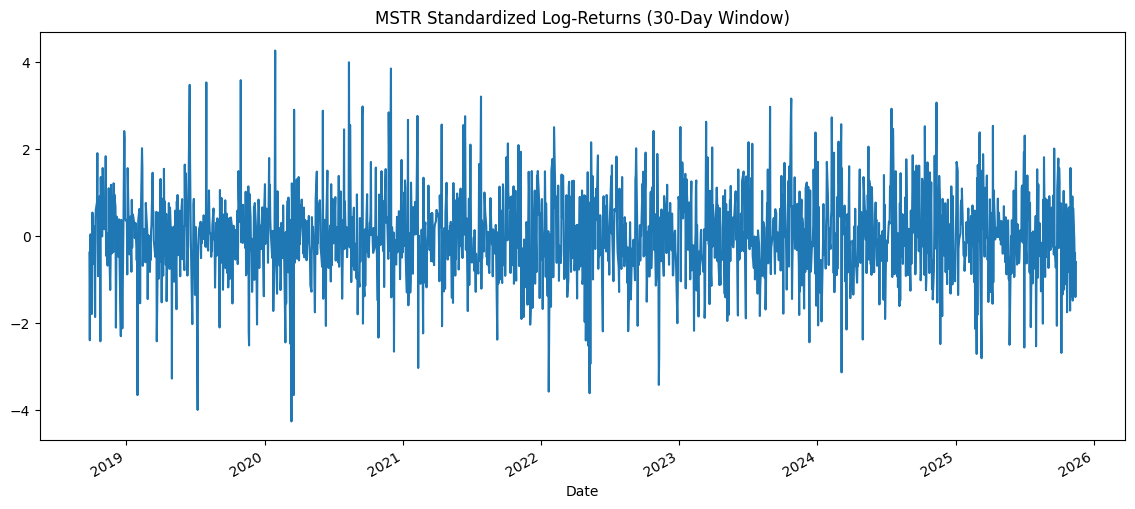

In [128]:
mstr["z_log_ret"].plot(
    figsize=(14,6),
    title="MSTR Standardized Log-Returns (30-Day Window)"
)

<Axes: >

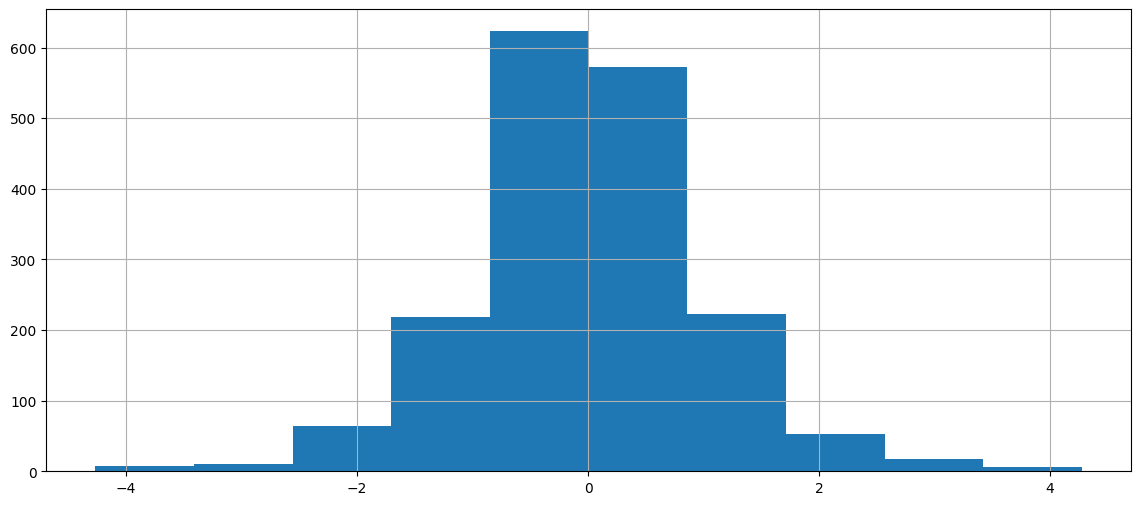

In [129]:
mstr["z_log_ret"].hist(figsize=(14, 6))

# 2. Correlation

In [130]:
print(btc.index.dtype, btc.index[:3])
print(mstr.index.dtype, mstr.index[:3])


datetime64[ns] DatetimeIndex(['2018-09-25', '2018-09-26', '2018-09-27'], dtype='datetime64[ns]', name='Date', freq=None)
datetime64[ns] DatetimeIndex(['2018-09-25', '2018-09-26', '2018-09-27'], dtype='datetime64[ns]', name='Date', freq=None)


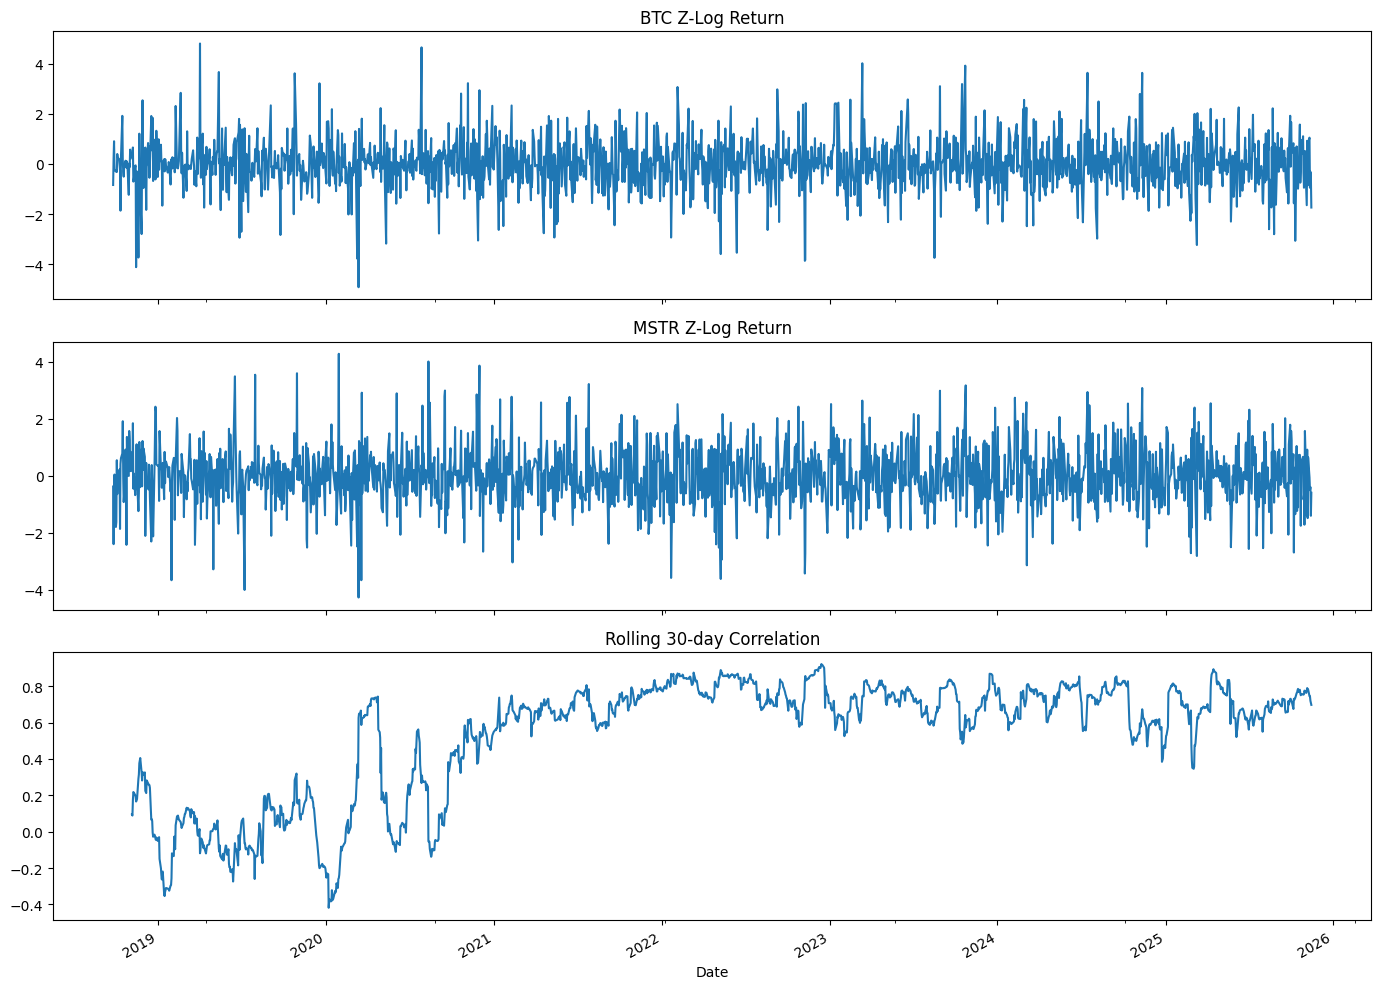

In [131]:
# 30 day rolling correlation between assets
corr = btc["z_log_ret"].rolling(30).corr(mstr["z_log_ret"])

import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 1, figsize=(14, 10), sharex=True)

btc["z_log_ret"].plot(ax=axs[0], title="BTC Z-Log Return")
mstr["z_log_ret"].plot(ax=axs[1], title="MSTR Z-Log Return")
corr.plot(ax=axs[2], title="Rolling 30-day Correlation")

plt.tight_layout()


Only use observations after MSTR adopted their BTC strategy

In [132]:
mstr = mstr.loc["2020-09-01":]
btc = btc.loc["2020-09-01":]
mstr.info()
btc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1309 entries, 2020-09-01 to 2025-11-14
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Close      1309 non-null   float64
 1   High       1309 non-null   float64
 2   Low        1309 non-null   float64
 3   Open       1309 non-null   float64
 4   Volume     1309 non-null   int64  
 5   log_ret    1309 non-null   float64
 6   ema_21     1309 non-null   float64
 7   z_log_ret  1309 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 92.0 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1309 entries, 2020-09-01 to 2025-11-14
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Close      1309 non-null   float64
 1   High       1309 non-null   float64
 2   Low        1309 non-null   float64
 3   Open       1309 non-null   float64
 4   Volume     1309 non-null   int64  
 5   log_ret    1309 

# 3. Spread Analysis

Date
2020-09-01    0.458292
2020-09-02    1.613776
2020-09-03    0.971142
2020-09-04   -1.413461
2020-09-08   -0.059453
                ...   
2025-11-10   -1.103313
2025-11-11    0.443608
2025-11-12   -0.085253
2025-11-13   -0.881890
2025-11-14    1.138489
Name: spread, Length: 1309, dtype: float64

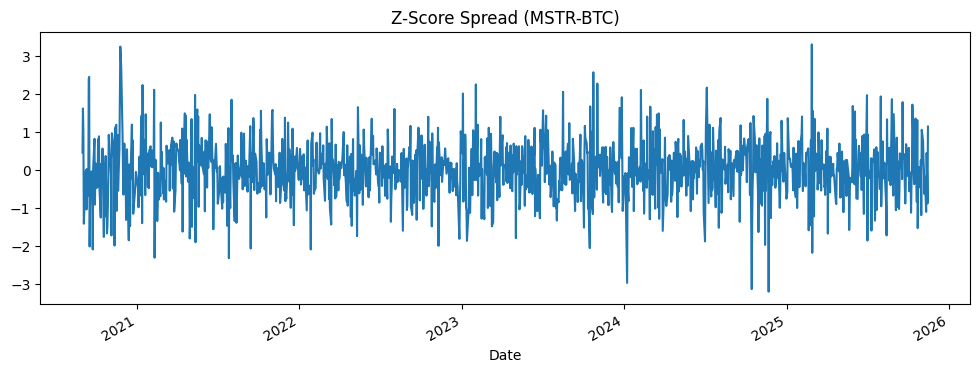

In [133]:
spread = (mstr["z_log_ret"] - btc["z_log_ret"]).rename("spread")
spread.plot(figsize=(12, 4), title="Z-Score Spread (MSTR-BTC)")
spread

Does the spread have any predictability of forward returns of MSTR, and is this convex?

In [134]:
import statsmodels.api as sm#

y = mstr["log_ret"].shift(-1).rolling(5).sum()
X = sm.add_constant(spread)

model = sm.OLS(y, X, missing="drop").fit(
    cov_type="HAC",
    cov_kwds={"maxlags":5}
)

model.params


const     0.010415
spread    0.019425
dtype: float64

In [135]:

horizons = [1, 3, 5, 10, 15, 20]
results = []

# Regress spread on H-period forwarded
for H in horizons:
    if H == 1:
        y = mstr["log_ret"].shift(-1)
    else:
        y = mstr["log_ret"].shift(-1).rolling(H).sum() 
    
    X = sm.add_constant(spread)

    model = sm.OLS(y, X, missing="drop").fit(
        cov_type="HAC", 
        cov_kwds={"maxlags":5}
    )

    results.append({
        "H": H,
        "beta": model.params["spread"],
        "t": model.tvalues["spread"],
        "p": model.pvalues["spread"]
    })

pd.DataFrame(results)




,H,beta,t,p
0,1,-0.005345,-2.195798,0.028106
1,3,0.021181,4.697679,0.000003
2,5,0.019425,3.417179,0.000633
3,10,0.014963,1.810951,0.070148
4,15,0.014429,1.487754,0.136816
5,20,0.013829,1.262758,0.206676


The effect is very small, interesting that the beta changes sign from short-term to medium-term. Since price movements of MSTR is just 1% per 1 std deviation (in difference). Therefore, we must look at MNAV filter, regime filter, volume, and nonlinearity. OLS results shows that MSTR's future returns tend to conitnue in the diretion implied by the MSTR-BTC spread.

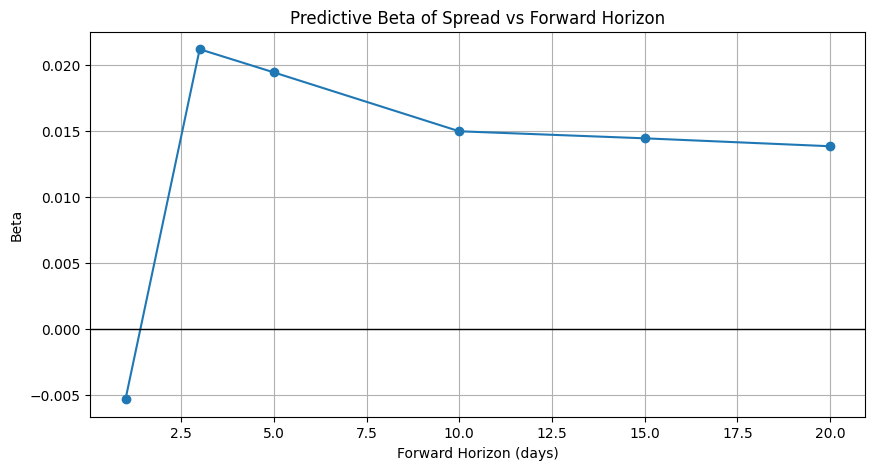

In [136]:
res = pd.DataFrame(results).sort_values("H")
res

plt.figure(figsize=(10, 5))
plt.plot(res["H"], res["beta"], marker="o")
plt.axhline(0, color="black", linewidth=1)
plt.title("Predictive Beta of Spread vs Forward Horizon")
plt.xlabel("Forward Horizon (days)")
plt.ylabel("Beta")
plt.grid(True)
plt.show()


In [137]:
spread_sq = (spread ** 2).rename("spread_sq")
results = []
    
X = pd.concat([spread, spread_sq], axis=1)
X = sm.add_constant(X)

# Regress spread on H-period forwarded
for H in horizons:
    if H == 1:
        y = mstr["log_ret"].shift(-1)
    else:
        y = mstr["log_ret"].shift(-1).rolling(H).sum() 
    

    model = sm.OLS(y, X, missing="drop").fit(
        cov_type="HAC", 
        cov_kwds={"maxlags":5}
    )

    results.append({
        "H": H,
        "b1": model.params["spread"],
        "b2": model.params["spread_sq"],
        "t_b1": model.tvalues["spread"],
        "t_b2": model.tvalues["spread_sq"],
        "p_b1": model.pvalues["spread"],
        "p_b2": model.pvalues["spread_sq"]
    })

pd.DataFrame(results)

,H,b1,b2,t_b1,t_b2,p_b1,p_b2
0,1,-0.005363,0.001214,-2.239867,0.642879,0.025100,0.520302
1,3,0.021132,0.004371,4.795154,1.244553,0.000002,0.213296
2,5,0.019388,0.002758,3.471329,0.492580,0.000518,0.622309
3,10,0.014822,0.010061,1.875665,1.215257,0.060701,0.224268
4,15,0.014579,0.015188,1.587152,1.540202,0.112478,0.123511
5,20,0.013824,0.020480,1.360868,1.791750,0.173555,0.073173


# 4. Cointegration

In [138]:
from statsmodels.tsa.stattools import adfuller

df = pd.concat([btc["Close"].rename("btc"), mstr["Close"].rename("mstr")], axis=1)
df["log_btc"] = np.log(df["btc"])
df["ret_btc"] = df["log_btc"].diff()

df["log_mstr"] = np.log(df["mstr"])
df["ret_mstr"] = df["log_mstr"].diff()

df["premium"] = df["log_mstr"] - df["log_btc"]
df.dropna(inplace=True)

df.head()


,btc,mstr,log_btc,ret_btc,log_mstr,ret_mstr,premium
Date,,,,,,,
2020-09-02,11414.034180,15.000,9.342599,-0.047600,2.708050,0.007898,-6.634549
2020-09-03,10245.296875,14.428,9.234574,-0.108025,2.669171,-0.038879,-6.565403
2020-09-04,10511.813477,14.219,9.260255,0.025681,2.654579,-0.014592,-6.605676
2020-09-08,10131.516602,13.882,9.223406,-0.036849,2.630593,-0.023986,-6.592813
2020-09-09,10242.347656,14.115,9.234286,0.010880,2.647238,0.016645,-6.587048


## Engle-Granger

In [139]:
X = sm.add_constant(df["log_btc"])
y = df["log_mstr"]

eg = sm.OLS(y, X).fit(cov_type="HC3")
df["ec"] = eg.resid # error correction term

print(eg.summary())

                            OLS Regression Results                            
Dep. Variable:               log_mstr   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                 1.047e+04
Date:                Sat, 06 Dec 2025   Prob (F-statistic):               0.00
Time:                        20:58:06   Log-Likelihood:                -265.38
No. Observations:                1308   AIC:                             534.8
Df Residuals:                    1306   BIC:                             545.1
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.5626      0.165    -76.013      0.0

In [140]:
adf_res = adfuller(df["ec"].dropna(), maxlag=None, autolag="AIC")

adf_stat, p_value, used_lag, n_obs = adf_res[:4]

print("ADF statistic on spread:", adf_stat)
print("p-value:", p_value)
print("used lags:", used_lag, " | n_obs:", n_obs)


ADF statistic on spread: -2.980040557965416
p-value: 0.03680087179988314
used lags: 1  | n_obs: 1306


## Rolling Cointegration

Let's try rolling cointegration test instead, to see some patterns with our eyes.

In [141]:
window = 180

adf_stats = []
pvals = []
betas = []
dates = []

for i in range(window, len(df)):
    sub = df.iloc[i-window:i]

    y = sub["log_mstr"]
    X = sm.add_constant(sub["log_btc"])

    model = sm.OLS(y, X).fit()
    beta = model.params["log_btc"]
    residuals = model.resid

    adf_res = adfuller(residuals, maxlag=None, autolag="AIC")

    adf_stats.append(adf_res[0])
    pvals.append(adf_res[1])
    betas.append(beta)
    dates.append(df.index[i])

roll = pd.DataFrame({
    "adf_stat": adf_stats,
    "pval": pvals,
    "beta": betas
}, index=dates)

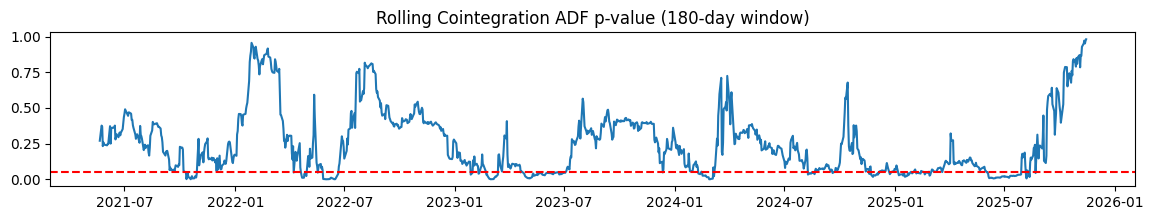

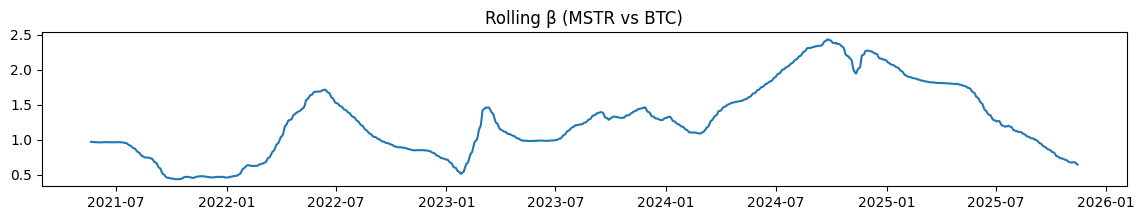

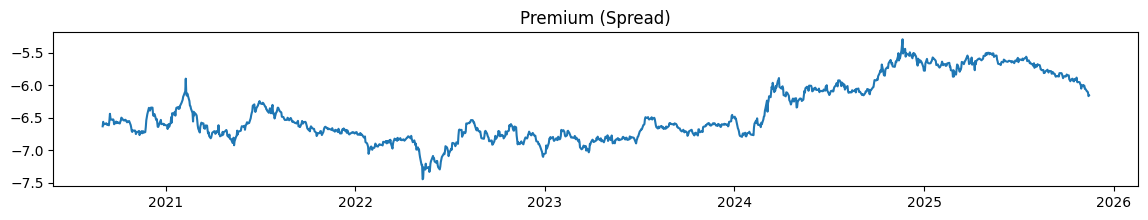

Text(0.5, 1.0, 'Log MSTR Prices')

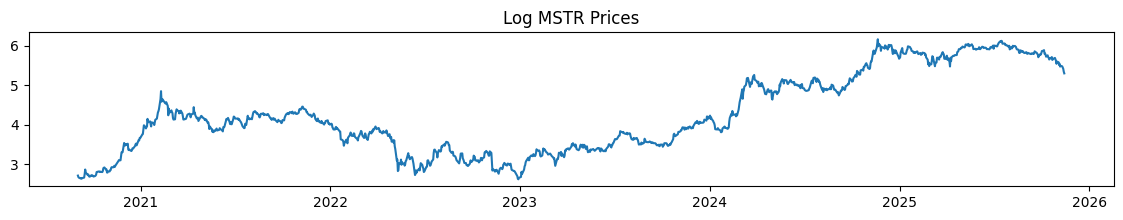

In [142]:
plt.figure(figsize=(14,2))
plt.plot(roll['pval'])
plt.axhline(0.05, color='red', linestyle='--')
plt.title("Rolling Cointegration ADF p-value (180-day window)")
plt.show()

plt.figure(figsize=(14,2))
plt.plot(roll['beta'])
plt.title("Rolling β (MSTR vs BTC)")

plt.figure(figsize=(14,2))
plt.plot(df.index, df['premium'])
plt.title("Premium (Spread)")
plt.show()

plt.figure(figsize=(14,2))
plt.plot(df.index, df['log_mstr'])
plt.title("Log MSTR Prices")


# 5. Simple Strategy

<Axes: title={'center': 'PnL'}, xlabel='Date'>

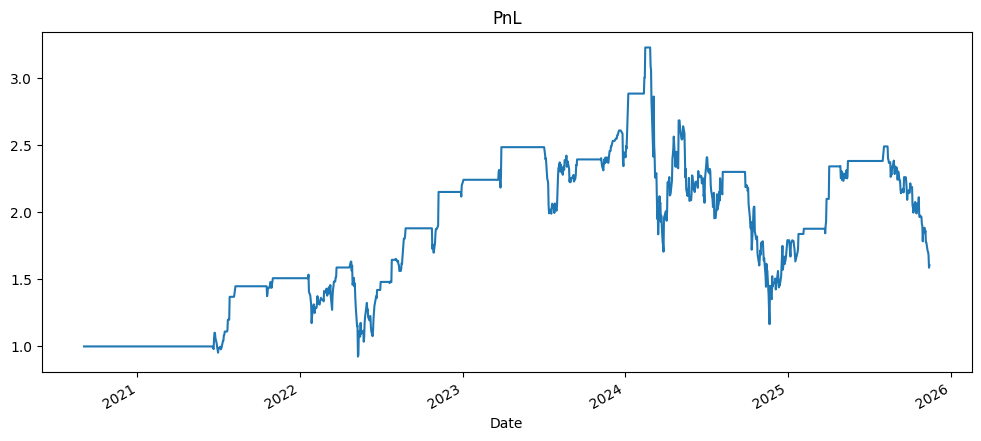

In [143]:
df["signal"] = 0
df["z_premium"] = (df["premium"] - df["premium"].rolling(200).mean())/(df["premium"].rolling(200).std())

df.loc[df["z_premium"]>1, "signal"] = -1
df.loc[df["z_premium"]<-1, "signal"] = 1

df["spread_ret"] = df["ret_mstr"] - df["ret_btc"] # Long mstr and short btc
df["strategy_ret"] = df["signal"].shift(1) * df["spread_ret"]

df["strategy_cumr"] = df["strategy_ret"].cumsum().apply(np.exp)
df["strategy_cumr"].plot(figsize=(12,5), title="PnL")


# 6. ECM

In [144]:
ecm_df = df[["ec", "ret_mstr", "ret_btc"]].copy()
ecm_df["ec_lag"] = ecm_df["ec"].shift()
ecm_df.dropna(inplace=True)

X = sm.add_constant(ecm_df[["ret_btc", "ec_lag"]])
y = ecm_df["ret_mstr"]

ecm_res = sm.OLS(y, X).fit(cov_type="HC3")
print(ecm_res.summary())

                            OLS Regression Results                            
Dep. Variable:               ret_mstr   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     352.6
Date:                Sat, 06 Dec 2025   Prob (F-statistic):          3.99e-123
Time:                        20:58:08   Log-Likelihood:                 2278.0
No. Observations:                1307   AIC:                            -4550.
Df Residuals:                    1304   BIC:                            -4535.
Df Model:                           2                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.001      0.163      0.8

<Axes: xlabel='Date'>

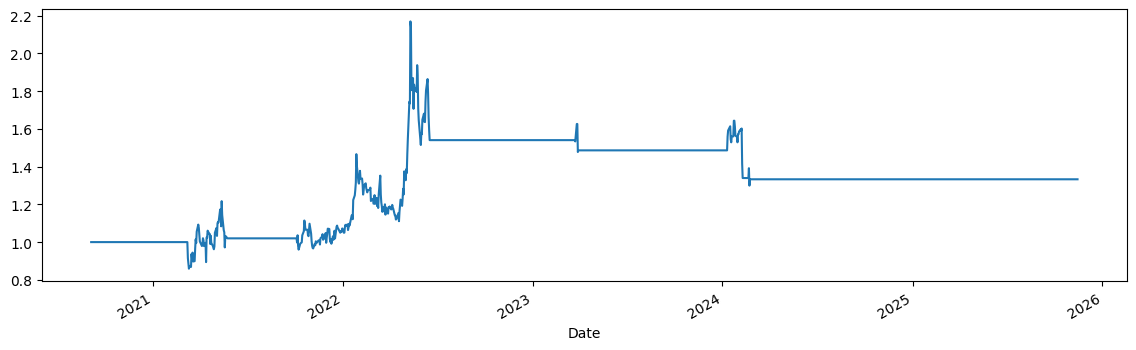

In [154]:
alpha = -0.0076
ecm_df["ecm_pred"] = alpha * ecm_df["ec_lag"]

k = ecm_df["ecm_pred"].std()

ecm_df["strat_ecm_signal"] = 0
ecm_df.loc[ecm_df["ecm_pred"]>k, "strat_ecm_signal"] = 1
ecm_df.loc[ecm_df["ecm_pred"]>k, "strat_ecm_signal"] = -1
ecm_df["spread_ret"] = ecm_df["ret_mstr"] - ecm_df["ret_btc"]

ecm_df["strat_ecm_ret"] = ecm_df["strat_ecm_signal"].shift() * ecm_df["spread_ret"]
ecm_df["strat_ecm_cum"] = ecm_df["strat_ecm_ret"].cumsum().apply(np.exp)
ecm_df["strat_ecm_cum"].plot(figsize=(14,4))
